# Introduction

The 2019–20 coronavirus pandemic is an ongoing pandemic of coronavirus disease 2019 (COVID-19) caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The outbreak was identified in Wuhan, China, in December 2019, declared to be a Public Health Emergency of International Concern on 30 January 2020, and recognized as a pandemic by the World Health Organization on 11 March 2020. As of 16 April 2020, more than 2.1 million cases of COVID-19 have been reported in 210 countries and territories, resulting in more than 140,000 deaths. More than 532,000 people have recovered, although there may be a possibility of relapse or reinfection. The deaths per diagnosed cases varies significantly between countries.

PCoronaviruses are a large family of viruses which may cause illness in animals or humans. In humans, several coronaviruses are known to cause respiratory infections ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS).The virus is primarily spread between people during close contact, often via small droplets produced by coughing, sneezing, or talking. While these droplets are produced when breathing out, they usually fall to the ground or onto surfaces rather than being infectious over long distances.

In [111]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/utm-of-india/UTM ZONES of INDIA.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths_US.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv
/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed_US.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv
/kaggle/input/icmr-testing-data/StateWiseTesting.csv
/kaggle/input/icmr-testing-data/testing data.csv
/kaggle/input/icmr-testing-data/ICMR_Testing_Data.csv
/kaggle/input/covid19inindia/HospitalBedsIndia.csv
/kaggle/input/covid19inindia/ICMRTestingLabs.csv
/kaggle/input/covid19inindia/StatewiseTestingDetails.csv
/kaggle/input/covid19i

# World Level Analysis

 ## Data Visualisation and Analysis

In [112]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import plotly.offline as py    
import plotly.io as pio
pio.templates.default = "plotly_dark"
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
import datetime
from datetime import datetime
import math
import matplotlib.ticker as ticker
import matplotlib.animation as animation
%matplotlib inline
sns.set(font_scale=1.4)
from plotly.subplots import make_subplots         
from IPython.display import HTML
import matplotlib.colors as mc
import colorsys
from random import randint
import re
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline

The ratio of the number of the countries affected due to the pandemic versus the ones who haven't been affected

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f93d7976c88>],
      dtype=object)

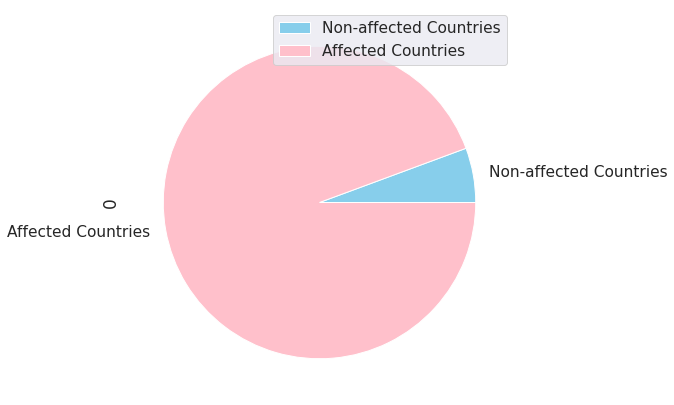

In [113]:
df = pd.DataFrame([11,184], index=['Non-affected Countries', 'Affected Countries'])
df.plot(kind='pie', subplots=True,colors=['skyblue','pink'], figsize=(7, 8))


The list of countires affected due to the pandemic

In [114]:
train=pd.read_csv('../input/covid19-global-forecasting-week-4/train.csv')
df3 = train.groupby('Country_Region')[['ConfirmedCases', 'Fatalities']].sum().reset_index()
countries = df3['Country_Region'].unique()
print(f'{len(countries)} countries are in dataset:\n{countries}')

184 countries are in dataset:
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' '

In [115]:
#Reading the cumulative cases dataset
covid_cases = pd.read_csv('../input/novel-corona-virus-2019-dataset/covid_19_data.csv')

#Viewing the dataset
covid_cases.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


Plotting a Running Map for observing the spread of COVID-19 Confirmed Cases

In [116]:
#Creating the interactive map
py.init_notebook_mode(connected=True)

#GroupingBy the dataset for the map
formated_gdf = covid_cases.groupby(['ObservationDate', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].max()
formated_gdf = formated_gdf.reset_index()
formated_gdf['Date'] = pd.to_datetime(formated_gdf['ObservationDate'])
formated_gdf['Date'] = formated_gdf['Date'].dt.strftime('%m/%d/%Y')

formated_gdf['log_ConfirmedCases'] = np.log(formated_gdf.Confirmed + 1)
formated_gdf['log_Fatalities'] = np.log(formated_gdf.Deaths + 1)

#Plotting the figure


fig = px.choropleth(formated_gdf, locations="Country/Region", locationmode='country names', 
                     color="log_ConfirmedCases", hover_name="Country/Region",projection="mercator",
                     animation_frame="Date",width=1000, height=800,
                     color_continuous_scale=px.colors.sequential.Viridis,
                     title='The Spread of COVID-19 Cases Across World')

#Showing the figure
fig.update(layout_coloraxis_showscale=True)
py.offline.iplot(fig)

**General Observations from the above Graph**

* The cases of COVID-19 starts from China as the epicenter with first initial COVID-19 Cases reported in Australia, US, Canada.

* Gradually cases in China increases and the confirmed cases is more than anywhere else in the world.

* Europe emerges later as the new epicenter for the virus, where there is a rapid rise in COVID-19 Cases in European Countries. This outbreak occurs where the confirmed number of COVID-19 Cases in China saturates.

* The confirmed cases of COVID-19 gradually spreads throughout the world, with spike in confirmed cases seen in European regions and US.

* As of April 3rd 2020, USA has the highest number of confimed COVID-19 Cases reported, with some European Countries emerging as the 2nd-4th highest cases of COVID-19

Visualisation showcasing the density of cases for every country

* Bar graph for confirmed cases vs deaths due to COVID-19 in World.
* Bar graph for confirmed cases vs number of people cured from COVID-19 in the World.

In [117]:
#Grouping the same cities and countries together along with their successive dates.

country_list = covid_cases['Country/Region'].unique()

country_grouped_covid = covid_cases[0:1]

for country in country_list:
    test_data = covid_cases['Country/Region'] == country   
    test_data = covid_cases[test_data]
    country_grouped_covid = pd.concat([country_grouped_covid, test_data], axis=0)
    
country_grouped_covid.reset_index(drop=True)
country_grouped_covid.head()

#Dropping of the column Last Update
country_grouped_covid.drop('Last Update', axis=1, inplace=True)

#Replacing NaN Values in Province/State with a string "Not Reported"
country_grouped_covid['Province/State'].replace(np.nan, "Not Reported", inplace=True)

#Printing the dataset
country_grouped_covid.head()

#country_grouped_covid holds the dataset for the country

#Creating a dataset to analyze the cases country wise - As of 04/19/2020

latest_data = country_grouped_covid['ObservationDate'] == '04/19/2020'
country_data = country_grouped_covid[latest_data]

#The total number of reported Countries
country_list = country_data['Country/Region'].unique()
#print("The total number of countries with COVID-19 Confirmed cases = {}".format(country_list.size))

unique_dates = country_grouped_covid['ObservationDate'].unique()
confirmed_cases = []
recovered = []
deaths = []

for date in unique_dates:
    date_wise = country_grouped_covid['ObservationDate'] == date  
    test_data = country_grouped_covid[date_wise]
    
    confirmed_cases.append(test_data['Confirmed'].sum())
    deaths.append(test_data['Deaths'].sum())
    recovered.append(test_data['Recovered'].sum())
    
#Converting the lists to a pandas dataframe.

country_dataset = {'Date' : unique_dates, 'Confirmed' : confirmed_cases, 'Recovered' : recovered, 'Deaths' : deaths}
country_dataset = pd.DataFrame(country_dataset)

#Plotting the Graph of Cases vs Deaths Globally.

fig = go.Figure()
fig.add_trace(go.Bar(x=country_dataset['Date'], y=country_dataset['Confirmed'], name='Confirmed Cases of COVID-19', marker_color='rgb(55, 83, 109)'))
fig.add_trace(go.Bar(x=country_dataset['Date'],y=country_dataset['Deaths'],name='Total Deaths because of COVID-19',marker_color='rgb(26, 118, 255)'))

fig.update_layout(title='Confirmed Cases and Deaths from COVID-19 in the world',xaxis_tickfont_size=14,
                  yaxis=dict(title='Reported Numbers',titlefont_size=16,tickfont_size=14,),
    legend=dict(x=0,y=1.0,bgcolor='rgba(255, 255, 255, 0)',bordercolor='rgba(255, 255, 255, 0)'),barmode='group',bargap=0.15, bargroupgap=0.1)
fig.show()


fig = go.Figure()
fig.add_trace(go.Bar(x=country_dataset['Date'], y=country_dataset['Confirmed'], name='Confirmed Cases of COVID-19', marker_color='rgb(55, 83, 109)'))
fig.add_trace(go.Bar(x=country_dataset['Date'],y=country_dataset['Recovered'],name='Total Recoveries because of COVID-19',marker_color='rgb(26, 118, 255)'))

fig.update_layout(title='Confirmed Cases and Recoveries from COVID-19 in the world',xaxis_tickfont_size=14,
                  yaxis=dict(title='Reported Numbers',titlefont_size=16,tickfont_size=14,),
    legend=dict(x=0,y=1.0,bgcolor='rgba(255, 255, 255, 0)',bordercolor='rgba(255, 255, 255, 0)'),
    barmode='group',bargap=0.15, bargroupgap=0.1)
fig.show()

**Analyses from the bar charts**

From the Graph of Confirmed Cases vs Deaths we observe the following trends.

* On March 17th 2020, 56 Days post the first confirmed case of COVID-19. The Global Count of confirmed covid-19 cases crossed 200k mark.
* Within 7 days, on 24th March 2020, the Global confirmed case count reached beyond 400k mark.
* It took 3 days from March 24th 2020 to March 27th 2020, for global confirmed case count to reach 600k mark.
* The same trends were observed of 3 days. On April 2, 2020 1m mark of COVID-19 was crossed.
* Within the next 2 days, 200k more confirmed cases was added.
* The total cumber of recovered cases was far more less than the confirmed cases. A total of 20.55% cases were recovered out of total confirmed cases as of April 6th 2020.

## Country wise analysis

In [118]:
top_country_df = dfc.query('(Date == @today) & (ConfirmedCases > 1000)').sort_values('ConfirmedCases', ascending=False)

top_country_melt_df = pd.melt(top_country_df, id_vars='Country_Region', value_vars='ConfirmedCases')

fig = px.bar(top_country_melt_df, x="Country_Region", y="value", color='variable',
              title=f'Confirmed Cases as on {today}')
fig.show()

In [119]:
top_countries = train.groupby('Country_Region')[['ConfirmedCases']].sum().reset_index()
top10_countries = top_countries.sort_values('ConfirmedCases', ascending=False).iloc[:10]['Country_Region'].unique()
top10_countries_df = dfc[dfc['Country_Region'].isin(top10_countries)]
fig = px.line(top10_countries_df,
              x='Date', y='ConfirmedCases', color='Country_Region',
              title=f'Confirmed Cases for top 10 countries as on {today}')
fig.show()

We can conclude from the above two plots that till 4th April, US had the highest number of cases which can be attriubuted to the fact that the rate of growth was much higher as comoared to other countries.

## Hypothesis: Are people living in cold regions more prone to the virus?

In [120]:
#Reading the temperature data file
temperature_data = pd.read_csv('../input/covcsd-covid19-countries-statistical-dataset/temperature_data.csv')

#Viewing the dataset
temperature_data.head()

,Date,State,Country,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,Wind_speed,Precipitation,Fog_Presence
0,22-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,5.89,9.4,0.00,0
1,23-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,5.56,14.9,0.00,1
2,24-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,4.50,10.4,0.17,1
3,25-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,7.78,6.1,0.57,1
4,26-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,6.00,10.8,0.00,1


In [121]:
#Checking the dependence of Temperature on Confirmed COVID-19 Cases

unique_temp = temperature_data['Temperature'].unique()
confirmed_cases = []
deaths = []

for temp in unique_temp:
    temp_wise = temperature_data['Temperature'] == temp
    test_data = temperature_data[temp_wise]
    
    confirmed_cases.append(test_data['Daily_cases'].sum())
    deaths.append(test_data['Daily_death'].sum())
    
#Converting the lists to a pandas dataframe.

temperature_dataset = {'Temperature' : unique_temp, 'Confirmed' : confirmed_cases, 'Deaths' : deaths}
temperature_dataset = pd.DataFrame(temperature_dataset)

In [122]:
#Plotting a scatter plot for cases vs. Temperature

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scattergl(x = temperature_dataset['Temperature'],y = temperature_dataset['Confirmed'], mode='markers',
                                  marker=dict(color=np.random.randn(10000),colorscale='Viridis',line_width=1)),secondary_y=False)

fig.add_trace(go.Box(x=temperature_dataset['Temperature']),secondary_y=True)

fig.update_layout(title='Daily Confirmed Cases (COVID-19) vs. Temperature (Celsius) : Global Figures - January 22 - March 30 2020',
                  yaxis=dict(title='Reported Numbers'),xaxis=dict(title='Temperature in Celsius'))

fig.update_yaxes(title_text="BoxPlot Range ", secondary_y=True)

fig.show()

**Observing the Trends**

The temperature Range (-4 Deree Celcius- 17 Degree Celcius) has the highest number of confirmed case count. Almost majority of the confirmed cases are in this range. Although the spread of COVID-19 is across all the temperature range, but within this range the spread is observed to be highest.

And as observed in the boxplot plotted over the scatter plot, within three quartiles of temperature (Q1-Q3) Majority and highest number of confirmed cases are observed.

## Conducting Hypothesis Testing

In [123]:
sample = temperature_dataset['Temperature'].sample(n=250)
test = temperature_dataset['Temperature']

from scipy.stats import ttest_ind

stat, p = ttest_ind(sample, test)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=-0.287, p=0.774


Since we get p value > 0.05 we can safely accept our null hypothesis and can conclude, that temperature affect on COVID-19 remains same over the population data. No statistical difference is present between the two datasets and the sole effect of temperature on spread of COVID-19 can be safely rejected. However, the idea of spread of COVID-19 across a certain range of temperature needs more dataset and statistical testing to come up with a substantial conclusion.

> ____________________________________________________________________________

# India level Analysis 

## Symptom Analysis

In [124]:
symptoms={'symptom':['Fever',
        'Dry cough',
        'Fatigue',
        'Sputum production',
        'Shortness of breath',
        'Muscle pain',
        'Sore throat',
        'Headache',
        'Chills',
        'Nausea or vomiting',
        'Nasal congestion',
        'Diarrhoea',
        'Haemoptysis',
        'Conjunctival congestion'],'percentage':[87.9,67.7,38.1,33.4,18.6,14.8,13.9,13.6,11.4,5.0,4.8,3.7,0.9,0.8]}

symptoms=pd.DataFrame(data=symptoms,index=range(14))

In [125]:
import plotly.express as ex
fig = px.bar(symptoms[['symptom', 'percentage']].sort_values('percentage', ascending=False), 
             x="percentage", y="symptom", color='symptom',color_discrete_sequence = ex.colors.cyclical.IceFire
              ,title='Symptom of Coronavirus',orientation='h')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_layout(barmode='stack')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',yaxis_title='Symptoms',xaxis_title='Percentages')
fig.update_layout(template = 'plotly_white')
fig.show()


In [126]:
covid_19_India = pd.read_csv('../input/covid19inindia/covid_19_india.csv')
date_wise_data = covid_19_India[['State/UnionTerritory',"Date","Confirmed","Deaths","Cured"]]
date_wise_data['Date'] = date_wise_data['Date'].apply(pd.to_datetime, dayfirst=True)
date_wise_data = date_wise_data.groupby(["Date"]).sum().reset_index()
def formatted_text(string):
    display(Markdown(string))
date_wise_data.to_csv('date_wise_data.csv')

temp = date_wise_data.copy()
fig = go.Figure(data=[
go.Bar(name='Deaths', x=temp['Date'], y=temp['Deaths'],marker_color='#ff0000'),
go.Bar(name='Recovered Cases', x=temp['Date'], y=temp['Cured'],marker_color='#2bad57'),
go.Bar(name='Confirmed Cases', x=temp['Date'], y=temp['Confirmed'],marker_color='#326ac7')])
fig.update_layout(barmode='stack')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_layout(title_text='COVID-19 Cases,Recovery and Deaths in India',
                  plot_bgcolor='rgb(275, 270, 273)')
fig.show()


## COVID cases in each age group

In [150]:
ageGroupDetailDS = pd.read_csv('/kaggle/input/covid19inindia/AgeGroupDetails.csv')
ageGroupDetailDS

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%
5,6,50-59,77,11.13%
6,7,60-69,89,12.86%
7,8,70-79,28,4.05%
8,9,>=80,10,1.45%
9,10,Missing,9,1.30%


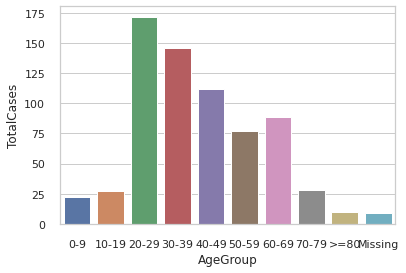

In [160]:
#Create a Bar Graph AgeGroup vs Total Cases
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set(style="whitegrid")
ax = sns.barplot(x="AgeGroup", y="TotalCases", data=ageGroupDetailDS)  

## Testing Scenario in India

In [149]:
dbd_testing_india = pd.read_excel('../input/coronavirus-cases-in-india/per_day_cases.xlsx', sheet_name='ICMR Testing Count')
# dbd_testing_india['Update Time Stamp'] = pd.to_datetime(dbd_testing_india['Update Time Stamp'], format='%d/%m/%Y %I:%M: %p')
#dbd_testing_india.head(2)

df_hos_bed = dbd_testing_india.rename(columns={'Update Time Stamp':'DateTime', 'Total Individuals Tested':'TotalIndividualsTested', 'Total Positive Cases':\
                                              'TotalPositiveCases'}).copy()
df_hos_bed['DateTime'] = df_hos_bed['DateTime'].dt.date
#df_hos_bed.head()

df_hos_bed['totalnegative'] = df_hos_bed['TotalIndividualsTested'] - df_hos_bed['TotalPositiveCases']

df_hos_bed_per_day = df_hos_bed.drop_duplicates(subset=['DateTime'], keep='last')
df_hos_bed_per_day['test_results_posratio'] = round(df_hos_bed_per_day['TotalPositiveCases']/df_hos_bed_per_day['TotalIndividualsTested'], 3)
#df_hos_bed_per_day.head()

df_hos_bed_per_day = df_hos_bed_per_day.dropna(subset=['TotalPositiveCases']).reset_index(drop=True)
df_hos_bed_per_day['TotalIndividualsTested'].fillna(df_hos_bed_per_day['Total Samples Tested']-900, inplace=True)
df_hos_bed_per_day['test_results_posratio'] = round(df_hos_bed_per_day['TotalPositiveCases']/df_hos_bed_per_day['TotalIndividualsTested'], 3)
df_hos_bed_per_day.head(2)

fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=df_hos_bed_per_day['DateTime'], y=df_hos_bed_per_day['test_results_posratio']*100, name='Confirmed Cases', \
                         marker=dict(color='#D32210')))
fig1.layout.update(title_text='COVID-19 Positive Detection per Test Ratio in India w.r.t. Time',xaxis_showgrid=False, width=700, yaxis_title='% of Patients Tested +ve',
        height=500,font=dict(
#         family="Courier New, monospace",
        size=12,
        color="white"
    ))
fig1.layout.plot_bgcolor = '#097E99'
fig1.layout.paper_bgcolor = '#097E99'
fig1.show()

XLRDError: No sheet named <'ICMR Testing Count'>

# State Wise Analysis

In [127]:
covid_India_cases = pd.read_csv('../input/covid19inindia/covid_19_india.csv')
covid_India_cases.rename(columns={'State/UnionTerritory': 'State', 'Cured': 'Recovered', 'Confirmed': 'Confirmed'}, inplace=True)

statewise_cases = pd.DataFrame(covid_India_cases.groupby(['State'])['Confirmed', 'Deaths', 'Recovered'].max().reset_index())
statewise_cases["Country"] = "India" # in order to have a single root node
fig = px.treemap(statewise_cases, path=['Country','State'], values='Confirmed',
                  color='Confirmed', hover_data=['State'],
                  color_continuous_scale='Rainbow')
fig.show()

In [128]:
covid_India_cases = pd.read_csv('../input/covid19inindia/covid_19_india.csv')
covid_India_cases.rename(columns={'State/UnionTerritory': 'State', 'Cured': 'Recovered', 'Confirmed': 'Confirmed'}, inplace=True)

statewise_cases = pd.DataFrame(covid_India_cases.groupby(['State'])['Confirmed', 'Deaths', 'Recovered'].max().reset_index())
last=statewise_cases
pos=pd.read_csv('../input/utm-of-india/UTM ZONES of INDIA.csv')
ind_grp=last.merge(pos , left_on='State', right_on='State / Union Territory')


## State Wise data (Map Visualisation)

In [129]:
import folium
map = folium.Map(location=[20.5937, 78.9629], zoom_start=4,tiles='cartodbpositron')

for lat, lon,state,Confirmed,Recovered,Deaths in zip(ind_grp['Latitude'], ind_grp['Longitude'],ind_grp['State'],ind_grp['Confirmed'],ind_grp['Recovered'],ind_grp['Deaths']):
    folium.CircleMarker([lat, lon],
                        radius=5,
                        color='red',
                      popup =(
                    'State: ' + str(state) + '<br>'
                    'Confirmed: ' + str(Confirmed) + '<br>'
                      'Recovered: ' + str(Recovered) + '<br>'
                      'Deaths: ' + str(Deaths) + '<br>'),

                        fill_color='blue',
                        fill_opacity=0.7 ).add_to(map)
map

## Testing Scenario Statewise

In [144]:
india_covid_19 = pd.read_csv('../input/covid19inindia/covid_19_india.csv')
state_details = pd.pivot_table(india_covid_19, values=['Confirmed','Deaths','Cured'], index='State/UnionTerritory', aggfunc='max')
state_details['Recovery Rate'] = round(state_details['Cured'] / state_details['Confirmed'],2)
state_details['Death Rate'] = round(state_details['Deaths'] /state_details['Confirmed'], 2)
state_details = state_details.sort_values(by='Confirmed', ascending= False)
state_details.style.background_gradient(cmap='Reds')

,Confirmed,Cured,Deaths,Recovery Rate,Death Rate
State/UnionTerritory,,,,,
Maharashtra,4669,572,232,0.12,0.05
Delhi,2081,431,47,0.21,0.02
Gujarat,2066,131,77,0.06,0.04
Rajasthan,1576,205,25,0.13,0.02
Madhya Pradesh,1540,127,76,0.08,0.05
Tamil Nadu,1520,457,17,0.3,0.01
Uttar Pradesh,1294,140,20,0.11,0.02
Telengana,919,190,23,0.21,0.03
Andhra Pradesh,757,96,22,0.13,0.03


In [145]:
state_testing = pd.read_csv('../input/covid19inindia/StatewiseTestingDetails.csv')
# state_testing
testing=state_testing.groupby('State').sum().reset_index()
fig = px.bar(testing, 
             x="TotalSamples",
             y="State", 
             orientation='h',
             height=800,
             title='Testing statewise insight')
fig.show()

---------------------------

## Analysis of the effect of lockdown on the number of cases

In [ ]:
#https://www.kaggle.com/n1sarg/covid-19-who-are-affected-due-to-lockdown-in-india
import pandas as pd
data= pd.read_csv('../input/covid19india/data.csv')
data[data['id'] == data['unique_id']].shape

In [ ]:
entities = ['schools & other educational organization shutdown','public places shutdown',
            'work from home started for employees','country under lockdown','current situation']
dates = ['2020-03-10','2020-03-13','2020-03-16','2020-03-21','2020-03-26']

In [ ]:
data = data.sort_values(by="diagnosed_date")

In [ ]:
mask1 = (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-09') # before school lockdown
mask1 = len(data.loc[mask1])
mask2 = (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-12') #before public place shutdown
mask2 = len(data.loc[mask2])
mask3 = (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-15') # beforw wfh
mask3 = len(data.loc[mask3])
mask4 = (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-21') # beforw lookdown
mask4 = len(data.loc[mask4])
mask5 = (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-26') # beforw lookdown
mask5 = len(data.loc[mask5])

In [ ]:
case_counts = [mask1, mask2,mask3,mask4,mask5]

In [ ]:
plot_data = pd.DataFrame({'dates':dates,'counts':case_counts,'entities': entities})
plot_data

In [ ]:
plot_data['dates'] = pd.to_datetime(plot_data['dates'])

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
labels = entities
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.size']=14
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9',   
                      '#C1F0F6', '#0099CC']
percentages = case_counts
explode=(0.1,0.1,0.1,0,0)
ax.pie(percentages, explode=explode, labels=labels,  
       colors=color_palette_list[0:2], autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.legend(frameon=False, bbox_to_anchor=(0.0,0.8))

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
plt.hlines(y=plot_data.entities, xmin=0, xmax=plot_data.counts, color='red')
plt.plot(plot_data.counts, plot_data.entities, "D")
# Add titles and axis names
ax.xaxis.label.set_color('black')
plt.yticks(plot_data.entities)
plt.title("Case Count Growth Rate After Lockdown")
plt.xlabel('Covid19 Case Count', fontsize=10)

As we can see if we connect the points the cases are probably levelling out which is a good thing! That means the lockdown has been pretty instrumental in containing the number of cases.

> ____________________________________________________________________________

## Predicting the number of cases in the next 10 days

## Data Exploration 

Here we have displayed the distribution of Primary Health Centers, District Hospitals, Sub District Hospitals, Rural and Urban hospitals per state. The data also consists of the number of 'beds' in Urban, Rural and Public health establishments.

In [152]:
hospitalBedsIndiaDS = pd.read_csv('/kaggle/input/covid19inindia/HospitalBedsIndia.csv')
hospitalBedsIndiaDS.head()

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,1,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27,575,3,500
1,2,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,3,Arunachal Pradesh,122,62,NaN,15,199,2320,208,2136,10,268
3,4,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
4,5,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936


In [154]:
print('Total no of hospital beds in the country:',sum(hospitalBedsIndiaDS['NumRuralBeds_NHP18'])+sum(hospitalBedsIndiaDS['NumUrbanBeds_NHP18'])+sum(hospitalBedsIndiaDS['NumPublicBeds_HMIS']))


Total no of hospital beds in the country: 2899570


Here we have displayed the number of cases per day and in what state they occured

In [170]:
covid19IndiaDS['total'] = (covid19IndiaDS['Cured']+covid19IndiaDS['Deaths']+covid19IndiaDS['Confirmed'])

In [172]:
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
covid19IndiaDS.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,total
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3,3


## Regression Analysis

### Here we attempt to predict that when will India exhaust its health facilities if the situation does not show much improvement 

In [186]:
covid19IndiaDS = pd.read_csv('/kaggle/input/covid19inindia/covid_19_india.csv')
len(covid19IndiaDS)
# type(covid19IndiaDS)

1190

In [175]:
cases={}

In [176]:
for month in range(1,5):
    dates=[]
    for i in range(1,31):
        date=''
        if len(str(i))==1:
            date='0'+str(i)+'/0'+ str(month)+'/20'
        else:
            date=str(i)+'/0'+ str(month)+'/20'
        dates.append(date)
    cases_l=[]
    for i in range(len(list(covid19IndiaDS['Date']))):
        if list(covid19IndiaDS['Date'])[i] in dates:
            #print('ping',list(covid19IndiaDS['Date'])[i])
            #covid19IndiaDS['Confirmed'][i])
            cases_l.append([list(covid19IndiaDS['Date'])[i],covid19IndiaDS['Confirmed'][i]])

    #print(cases_l)
    cases_temp=dict()

    for line in cases_l:
        if line[0] in cases_temp:
            cases_temp[line[0]].append(line[1])
        else:
            cases_temp[line[0]] = [line[1]]

    for i in cases_temp:
        summ=sum(cases_temp[i])
        cases_temp[i]=summ

    cases.update(cases_temp)
    #(cases)

In [177]:
print('The no of days since the epidemic started are:',len(cases))

The no of days since the epidemic started are: 81


In [178]:
print('The no of cases till April 20th in India:',sum(cases.values()))

The no of cases till April 20th in India: 190665


In [179]:
# len(cases.keys())
x=[]
for i in range(0,81):
    x.append(i)
X_train=np.array(x)
X_train=X_train.reshape(-1,1)

<Figure size 5000x5000 with 0 Axes>

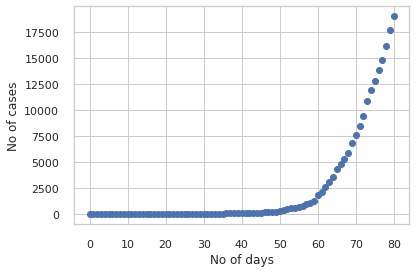

<Figure size 5000x5000 with 0 Axes>

In [180]:
import numpy as np
import matplotlib.pyplot as plt
# X = np.array(list(cases.keys()))
plt.ylabel('No of cases')
plt.xlabel('No of days')
Y = np.array(list(cases.values()))
plt.scatter(X_train,Y)
# plt.show()
from matplotlib.pyplot import figure
figure(num=None, figsize=(50, 50), dpi=100, facecolor='w', edgecolor='k')
#figure(figsize=(10,10))

In [182]:
# Alpha (regularization strength) of LASSO regression
lasso_eps = 0.0001
lasso_nalpha=20
lasso_iter=10000
# Min and max degree of polynomials features to consider
degree_min = 2
degree_max = 8
# Test/train split
# X_train, X_test, y_train, y_test = train_test_split(df['X'], df['y'],test_size=test_set_fraction)
# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
for degree in range(degree_min,degree_max+1):
    model = make_pipeline(PolynomialFeatures(degree, interaction_only=False), LassoCV(eps=lasso_eps,n_alphas=lasso_nalpha,max_iter=lasso_iter,
normalize=True,cv=5))
    model.fit(X_train,Y)
    #test_pred = np.array(model.predict(X_test))
    #RMSE=np.sqrt(np.sum(np.square(test_pred-y_test)))
    #test_score = model.score(X_test,y_test)

Prediction of the number of cases in the next 10 days

In [184]:
x=[]
for i in range(82,92):
    x.append(i)
X_test=np.array(x)
X_test=X_test.reshape(-1,1)
test_pred = np.array(model.predict(X_test))
test_pred

array([23537.31472618, 25693.48242163, 28013.0491235 , 30506.11735456,
       33183.28230051, 36055.64961373, 39134.85364082, 42433.07607903,
       45963.06506649, 49738.1547113 ])

In [185]:
x=[]
threshold=83
days=0
i=82
while(i<threshold):
    x.append(i)
    X_test=np.array(x)
    X_test=X_test.reshape(-1,1)
    test_pred = np.array(model.predict(X_test))
    if sum(test_pred)+190665>=2899570:
        print('In '+str(days)+' days India will exhaust its beds in public health facilities')
        break
    else:
        days=days+1
        threshold+=1
    i=i+1


In 30 days India will exhaust its beds in public health facilities


 ____________________________________________________________________________